# The Subway Reviews Problem
**Author:** Barbara Talagan
**Date** December 16, 2022

## Data Information
This graded assignment is based on reviews shared by customers on the Yelp platform. The data is released by Yelp for academic use and can be found at Yelp Open Dataset. A subset 
of data is being shared with you for academic use. Please read the Yelp Dataset Terms of Use before proceeding with the assignment. 
The assignment uses names of real companies and individuals as they appear in the dataset. The context laid out, however, is purely fictitious.

1.	Part A: Does the data support the statement made by the Head of Customer Service? “Our ratings are gradually improving, and we will soon reach 4.5/5.”

In [2]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [3]:
# Setup

# Importing the Two Datasets
dfrevs = pd.read_csv('/Users/barbaratalagan/Desktop/reviews.csv')

dfrest = pd.read_csv('/Users/barbaratalagan/Desktop/restaurants.csv')

# left join with both datasets
#everything in the review set remains 
df = dfrevs.merge(dfrest[['business_id','name','state']], how = 'left', 
                  on = 'business_id')

Text(0, 0.5, 'Number of Ratings')

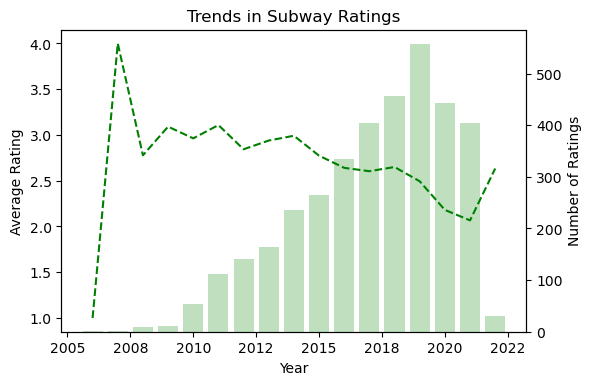

In [4]:
# Part A

# Creating a Year column in the dfrevs dataframe

df['year'] = pd.to_datetime(df['date']).dt.year

# Filtering out for Subway
sub_ratings = df.loc[df['name'] == 'Subway']

# Calculating mean of star for every year

rating_trend = pd.DataFrame(sub_ratings.groupby(['year'], 
                                                as_index = False).stars.mean())

# Calculating the total of reviews for every year

rating_count = pd.DataFrame(sub_ratings.groupby(['year'], 
                                                as_index = False).review_id.count())

# Plotting 

# Making variables for the plot (I tried using loc but it didn't work 
    #for some reason)

x1 = rating_trend['year']

y1 = rating_trend['stars']

z1 = rating_count['review_id']

# Creating the plot 

fig, ax = plt.subplots(dpi = 100)
ax.plot(x1, y1, 'g--')

# Fixing and labelling the axis
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.set_xlabel('Year')

ax.set_ylabel('Average Rating')

ax.set_title('Trends in Subway Ratings')

ax2 = ax.twinx()
ax2.bar(x1,z1, alpha = 0.25, color = 'green')
ax2.set_ylabel('Number of Ratings')

From the plot above, we can see that Subway's star ratings are not increasing through 2018-2021, so I do not think we can assume that Subway's ratings are improving over time. We cannot make inferences about the trend line before 2016 or after 2021, since there weren't enough ratings in the sample between 2005-2015, and 2022 (displayed by the bars). This may be attributed to a lack of popularity of rating sites during that time period and the data only being collected during early 2022. Since we can only look at the data from 2016-2021, we should be cautious when analyzing trends because this isn't a large time frame. Despite this, by looking at the trendline in this time period one could say that the ratings are not improving and may even be worsening.

Part B: Is this statement valid across all states?

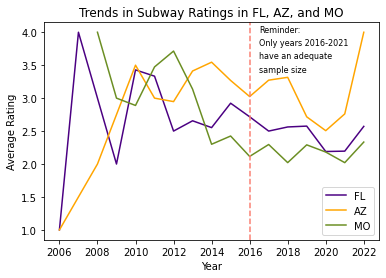

In [5]:
# Part B

# Trying to see which states has the largest review samples to plot

# Counting how many reviews each state has
states_trend = pd.DataFrame(sub_ratings.groupby(['state'], 
                                                as_index = False).
                            review_id.count())

# Sorting them to see the largest sample
state_values = states_trend.sort_values(by="review_id", ascending=False)

# Taking a look at the data

state_values.head()

# FL = 645, AZ = 484, MO = 446, IN = 433, NV = 364

# Grouping the data fram by year and state and finding the average star rating

state_ratings = pd.DataFrame(sub_ratings.groupby(['year', 'state'], as_index = False).stars.mean())

# Plotting

# Creating Variables

FL = state_ratings.loc[state_ratings['state']== 'FL']
AZ = state_ratings.loc[state_ratings['state']== 'AZ']
MO = state_ratings.loc[state_ratings['state']== 'MO']

# Creating Figure

# Plotting lines
plt.plot(FL.year, FL.stars, color = 'indigo', label = 'FL')
plt.plot(AZ.year, AZ.stars, color = 'orange', label = 'AZ')
plt.plot(MO.year, MO.stars, color = 'olivedrab', label = 'MO')
# Creating a reference line
plt.axvline(2016, color= 'salmon', linestyle = '--')
# Creating a text box
plt.text(2016.5, 4.0, "Reminder:", fontsize = 8)
plt.text(2016.5, 3.8, "Only years 2016-2021", fontsize = 8)
plt.text(2016.5, 3.6, "have an adequate", fontsize = 8)
plt.text(2016.5, 3.4, "sample size", fontsize = 8)
# Adding a legend
plt.legend()
# Adding axis labels
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trends in Subway Ratings in FL, AZ, and MO')

plt.show()

The following chart shows the three states with the largest samples of Subway reviews. There is no evidence that Subway's ratings are steadily rising in all three states when examining data from 2016-2021. Each state's rating tends to fluctuate and there’s no definite positive trend of average reviews.

2.	Does the data support the statement made by the Head of Store Operations?  “Sandwiches are a tricky business. All sandwich chains suffer from poor customer ratings.”

Part A: Are sandwiches the only tricky business?

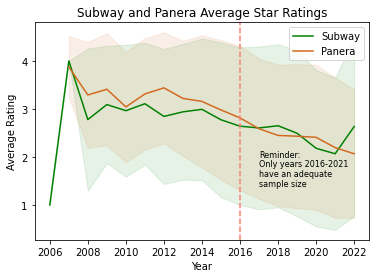

In [6]:
# 2

# Part A

# Joining datasets

df2 = dfrevs.merge(dfrest[['business_id', 'name', 'categories']], how = 'left', on = 'business_id')

# creating a year column 
df2['year'] = pd.to_datetime(df2['date']).dt.year

# Filtering for sandwich shops

sandwich_shops = df2.loc[df2['categories'].str.contains('Sandwich',na = False)]

# Finding the sandwich shops with the most reviews 
sandwich_count = pd.DataFrame(sandwich_shops.groupby(['name'], as_index = False).review_id.count())

# Sorting them to see the largest sample
sandwich_sort = sandwich_count.sort_values(by="review_id", ascending=False)

# Seeing which ones have the most reviews
sandwich_sort.head()

# Panera Bread = 6906, Domino's Pizza = 6044, Wawa = 4137, Jimmy John's = 3958, Subway = 3623

# want to get average review by year from subway panera

sandwich_comp = pd.DataFrame(sandwich_shops.groupby(['name', 'year'], as_index = False).stars.mean())
sandwich_comp_std = pd.DataFrame(sandwich_shops.groupby(['name', 'year'], as_index = False).stars.std())

# Plotting

# Creating Variables

Subway = sandwich_comp.loc[sandwich_comp['name']== 'Subway']
Panera = sandwich_comp.loc[sandwich_comp['name']== 'Panera Bread']

Subway_std = sandwich_comp_std.loc[sandwich_comp['name']== 'Subway']
Panera_std = sandwich_comp_std.loc[sandwich_comp['name']== 'Panera Bread']

# Creating Figure

# Creating lines
plt.plot(Subway.year, Subway.stars, color = 'green', label = 'Subway')
plt.plot(Panera.year, Panera.stars, color = 'chocolate', label = 'Panera')
# Plotting the standard dev shading
plt.fill_between(Subway.year, Subway.stars-Subway_std.stars, Subway.stars+Subway_std.stars, 
                 alpha=0.1, color = 'g')
plt.fill_between(Panera.year, Panera.stars-Panera_std.stars, Panera.stars+Panera_std.stars, 
                 alpha=0.1, color = 'chocolate')
# Creating a reference line
plt.axvline(2016, color= 'salmon', linestyle = '--')
# Creating a text box 
plt.text(2017, 2.0, "Reminder:", fontsize = 8)
plt.text(2017, 1.8, "Only years 2016-2021", fontsize = 8)
plt.text(2017, 1.6, "have an adequate", fontsize = 8)
plt.text(2017, 1.4, "sample size", fontsize = 8)
# Adding a legend
plt.legend()
# Adding Axis labels
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Subway and Panera Average Star Ratings')
plt.show()

Between 2016 and 2021, Subway and Panera* experienced similar ratings trends. Despite this, it appears that their ratings are inverse; when Subway's ratings are high, Panera's ratings are low, and vice versa. Overall, the two do not have outstanding ratings, so it may be possible to say that sandwich chains suffer from poor customer ratings. It may be necessary to conduct further research on sandwich chains in order to confirm this. It also may be possible that they receive such poor ratings because they are chain restaurants and not because they both sell sandwiches (see number 3). 

*I chose Panera as Subway’s competitor because it is a categorized sandwich restaurant with the highest number of reviews. I thought it would be best to choose a sandwich chain because local restaurants on average may earn a higher star rating (see number 3)

3.	Part A: Does the data support the statement made by the Head of Social Media? The goal of 4.5/5 is unreasonable for national chains like us. Only small, local, and boutique restaurants can achieve such high ratings.”

/var/folders/9c/zwwhrt1d5cd3rs7hnc74qy980000gn/T/ipykernel_77654/3189028217.py:53: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_rating = average_rating.append(subway_2021_star)


Text(0.5, 1.0, 'Average Rating for Local, Chain, and Subway Restaurants in 2021')

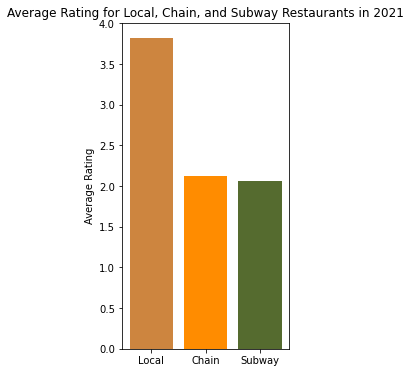

In [7]:
# Setting up 

# Joining the datasets
df3 = dfrevs.merge(dfrest[['business_id', 'name', 'state']], how = 'left', 
                   on = 'business_id')

# Adding year

df3['year'] = pd.to_datetime(df3['date']).dt.year

# Filtering for 2021 Data simplify the graph
df3 = df3.loc[df3['year'] == 2021]

# Finding the number of cities each restaurant is in
cities = pd.DataFrame(dfrest.groupby(['name'], as_index = False).city.nunique())

# Categorizing Restaurants that are in more than 50 cities as chain and those in 1 as local

cities['sizes'] = cities.apply(lambda x: "chain" if x['city'] > 50 else
                                   "local" if x['city'] == 1 else
                                   "midsize", axis = 1)

# Calcluating average stars for each restaurant 

rest_mean = pd.DataFrame(df3.groupby(['name'], as_index = False).stars.mean())

# Merging to get the city and average star info on one dataframe

cities = rest_mean.merge(cities[['name', 'city', 'sizes']], how = 'left', on = 'name')

# Part A 

size = pd.DataFrame(cities.groupby(['sizes'], as_index = False).stars.mean())

# Finding the average rating for Subway in 2021
subway_avg = rating_trend.loc[rating_trend['year'] == 2021]

  # Extracting the average rating for Subway in 2021 (2.0667 avg star rating)
  
subway_2021_star = pd.DataFrame(subway_avg.loc[:,'stars'])
subway_2021_star = subway_2021_star.loc[15, 'stars']
subway_2021_star = pd.Series(subway_2021_star)

# data for bar graph

  # labels
chain_local_subway = pd.Series(['Local', "Chain", 'Subway'])

  # slicing for avg star rating for local, chain, and Subway
average_rating = size.loc[:,'stars']

  # Adding subway to the end of the avg star rating series
average_rating = average_rating.append(subway_2021_star)
    
  # Sorting the avg star rating
average_rating = average_rating.sort_values(ascending= False)

# Plotting Average Rating for Chain, Local, and Subway Restaurants in 2021
plt.figure(figsize=(3, 6))
# Creating bars, changing width, changing colors
plt.bar(chain_local_subway, average_rating, width = .8, color = ['peru', 'darkorange', 'darkolivegreen'])
# Adding labels
plt.ylabel('Average Rating')
plt.title('Average Rating for Local, Chain, and Subway Restaurants in 2021')


Local restaurants have a higher overall average than chain restaurants and Subway, so the Head of Social Media's statement may be correct. However, Subway's average star rating isn't too far off from the average for chains. There is a larger sample of locally owned restaurants compared to national chains so this may have had an impact on average star ratings.

Part B: Is it true that average rating decreases as the size of restaurant increases?

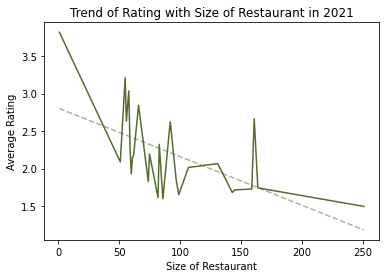

In [8]:
# Part B 

# Grouping by the amount of cities each restaurant is in for the plot

city_count = pd.DataFrame(cities.groupby(['city'], as_index = False).stars.mean())

# Getting a trend line

z = np.polyfit(city_count.loc[:,'city'], city_count.loc[:,'stars'],1)

p = np.poly1d(z)

# Plotting Trend of Rating with Size of Restaurant

plt.plot(city_count.city, city_count.stars, color = 'darkolivegreen')
plt.plot(city_count.city, p(city_count.city), color = 'darkolivegreen', linestyle = '--', alpha = .5)
plt.xlabel('Size of Restaurant')
plt.ylabel('Average Rating')
plt.title('Trend of Rating with Size of Restaurant in 2021')
plt.show()

By looking at the trend line in the plot above, we can see that an increase in the size of a restaurant may lead to a decrease in the average rating. The trendline indicates a negative relationship between the two, but there are fluctuations between 50 and 160 cities so it may not be accurate.

4.	Part A: Does the data support the statement made by the Chief Data Scientist? “It is well known that customers make the effort to give a rating only when they are either extremely angry or absolutely delighted with the service. So online ratings are not reliable.”

Text(0.5, 1.0, "Subway's Number of Reviews by Rating 2021")

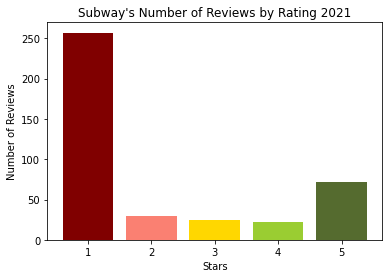

In [28]:
# Part A

# Joining Datsets
df4 = dfrevs.merge(dfrest[['business_id', 'name']], how = 'left', on = 'business_id')

# Adding year
df4['year'] = pd.to_datetime(df4['date']).dt.year

# Filtering for years 2018-2021

df4_2021 = df4.loc[df4['year'] == 2021]

# Filtering for Subway
df4_Subway = df4_2021.loc[df4_2021['name'] == 'Subway']

# Getting the count of each star (1-5)

subway_ratings = pd.DataFrame(df4_Subway.groupby(['stars'], as_index = False).stars.value_counts())

# Getting data for the plot

# X-axis

ratings_1_to_5 = [1,2,3,4,5]

# Height

# Plotting

subway_stars = subway_ratings.loc[:,'count']

plt.bar(ratings_1_to_5, subway_stars, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title("Subway's Number of Reviews by Rating 2021")

In 2021, Subway has received more one- and five-star ratings than two-four-star ratings. However, there are far more one-star ratings than five. Therefore, people who eat at Subway may only write reviews when they are extremely angry. They may also only have really bad and not good experiences at Subway.

Part B: Is the statement true across all years from 2018 to 2021? 

Text(0.5, 0, 'Stars')

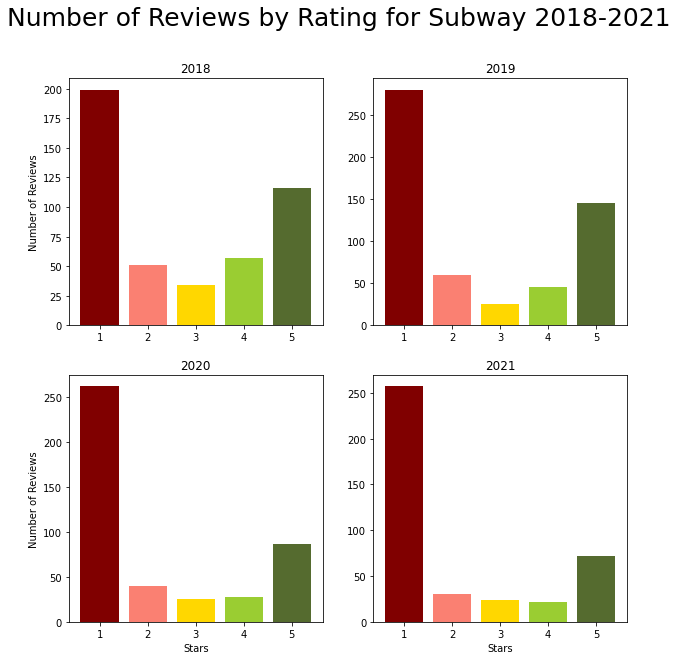

In [29]:
# Part B

# Finding the number of reviews by rating (1-5)

# Filtering for 2018-2021

df4_2018_2021 = df4.loc[df4['year'] > 2017]

df4_2018_2021 = df4_2018_2021.loc[df4['year'] < 2022]

# Filtering for Subway 

df4_2018_2021 = df4_2018_2021.loc[df4_2018_2021['name'] == 'Subway']

# Getting the count of each star (1-5) for every year

ratings_count = pd.DataFrame(df4_2018_2021.groupby(['year', 'stars'], as_index = False).stars.value_counts())

# Filtering for each separate year
twenty_18 = ratings_count.loc[ratings_count['year']== 2018]
twenty_19 = ratings_count.loc[ratings_count['year']== 2019]
twenty_20 = ratings_count.loc[ratings_count['year']== 2020]
twenty_21 = ratings_count.loc[ratings_count['year']== 2021]

# X for the bar chart (already wrote the code above but its here for reference)
ratings_1_to_5 = [1,2,3,4,5]

# Height for the bar chart
twenty_18 = twenty_18.loc[:,'count']
twenty_19 = twenty_19.loc[:,'count']
twenty_20 = twenty_20.loc[:,'count']
twenty_21 = twenty_21.loc[:,'count']

# Plotting a Subplot

# Creating Subplots and Title
fig, ax = plt.subplots(2,2, figsize = (10,10))
fig.suptitle("Number of Reviews by Rating for Subway 2018-2021", fontsize = 25)

# 2018
ax[0,0].bar(ratings_1_to_5, twenty_18, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[0,0].set_title("2018")
ax[0,0].set_ylabel("Number of Reviews")

# 2019
ax[0,1].bar(ratings_1_to_5, twenty_19, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[0,1].set_title("2019")

# 2020
ax[1,0].bar(ratings_1_to_5, twenty_20, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[1,0].set_title("2020")
ax[1,0].set_xlabel("Stars")
ax[1,0].set_ylabel("Number of Reviews")

# 2021

ax[1,1].bar(ratings_1_to_5, twenty_21, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[1,1].set_title("2021")
ax[1,1].set_xlabel("Stars")


There are slightly more five-star reviews in 2018-2019 than in 2021, then the number starts to decline in 2020. Again, One-star ratings continue to outnumber five-star ratings throughout 2018-2021. As a result, people may be more inclined to write a review if they have a really bad experience at Subway during the years of 2018-2021. The high numbers of one-star ratings are skewing the average rating of Subway (2.06) so the Chief data scientist may be right. However, Subway may also not give exceptional experiences because it is a chain restaurant (see number 3). People may not be ‘wowed’ by chain restaurants compared to local because of their general low customer service or food quality.

5.	Based on the insights generated from Questions 1 through 4, what would be your recommendation to John and the team (at most 100 words)? Your response should include, but may not be limited to the following:
●	Is there cause for John to worry? Justify your answer.
●	Is the target of 4.5/5 reasonable? If “yes,” justify your answer. If “no,” what do you think would be reasonable and why?
●	Support your recommendations by quoting appropriate numbers computed from the data.

John may have a reason to worry if he is adamant that Subway should reach a 4.5/5-star rating. Subway's average star rating has not seemed to be risen over the course of 2016-2021 and averaged at 2.06 stars in 2021. Despite this, I think that this may be a normal rating for a chain restaurant because it is almost the same as the chain restaurant’s average star rating of 2.12 stars. I think it may be reasonable for Subway to improve its ratings to or slightly above than the national chain star average in the future if Subway emulated qualities of local restaurants (which as a whole have an average star rating of 3.81) such as great customer service and food quality.  

Bonus question: What additional insight on ratings can you provide John?

Number 4 Continued Analysis: All Restaurants

Text(0.5, 0, 'Stars')

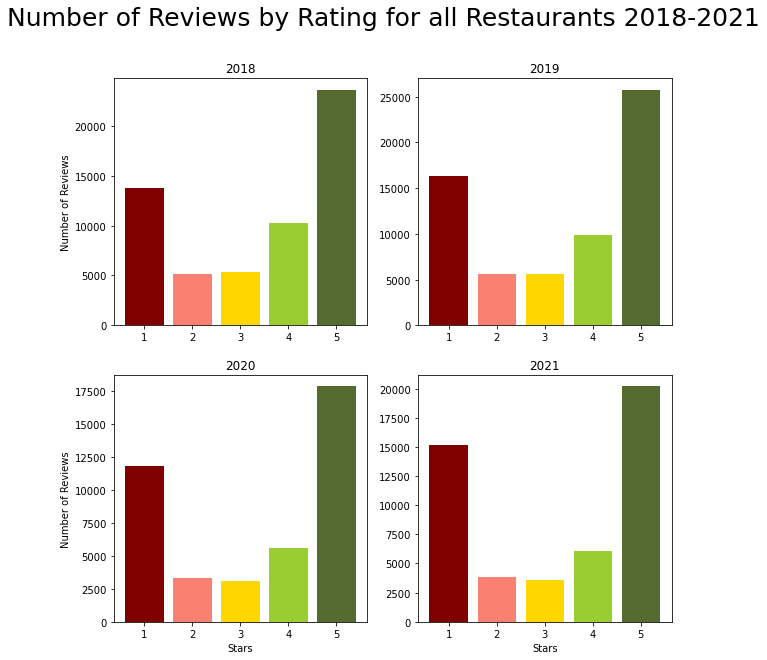

In [35]:
# Bonus 

# Part A

# Joining Datsets
df_bonus = dfrevs.merge(dfrest[['business_id', 'name']], how = 'left', on = 'business_id')

# Adding year
df_bonus['year'] = pd.to_datetime(df_bonus['date']).dt.year

# Filtering for years 2018-2021

df_bonus = df_bonus.loc[df_bonus['year'] > 2017]

# Part B

# Finding the number of reviews by rating (1-5)
rest_bonus = pd.DataFrame(df_bonus.groupby(['year', 'stars'], as_index = False).stars.value_counts())

# Filtering for each separate year
twenty_18_bonus = rest_bonus.loc[rest_bonus['year']== 2018]
twenty_19_bonus = rest_bonus.loc[rest_bonus['year']== 2019]
twenty_20_bonus = rest_bonus.loc[rest_bonus['year']== 2020]
twenty_21_bonus = rest_bonus.loc[rest_bonus['year']== 2021]

# X for the bar chart (already wrote the code above but its here for reference)
ratings_1_to_5 = [1,2,3,4,5]

# Height for the bar chart
twenty_18_bonus = twenty_18_bonus.loc[:,'count']
twenty_19_bonus = twenty_19_bonus.loc[:,'count']
twenty_20_bonus = twenty_20_bonus.loc[:,'count']
twenty_21_bonus = twenty_21_bonus.loc[:,'count']

# Plotting a Subplot

# Creating Subplots and Title
fig, ax = plt.subplots(2,2, figsize = (10,10))
fig.suptitle("Number of Reviews by Rating for all Restaurants 2018-2021", fontsize = 25)

# 2018
ax[0,0].bar(ratings_1_to_5, twenty_18_bonus, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[0,0].set_title("2018")
ax[0,0].set_ylabel("Number of Reviews")

# 2019
ax[0,1].bar(ratings_1_to_5, twenty_19_bonus, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[0,1].set_title("2019")

# 2020
ax[1,0].bar(ratings_1_to_5, twenty_20_bonus, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[1,0].set_title("2020")
ax[1,0].set_xlabel("Stars")
ax[1,0].set_ylabel("Number of Reviews")

# 2021

ax[1,1].bar(ratings_1_to_5, twenty_21_bonus, color = ['maroon', 'salmon','gold', 'yellowgreen',
                                                 'darkolivegreen'])
ax[1,1].set_title("2021")
ax[1,1].set_xlabel("Stars")


Now when we take a look at number of reviews by rating for all restaurants it shows the opposite pattern than when we were looking at Subway. This may mean that people in general only write really good and bad reviews when they go to a restaurant. There are also more local restaurants in the data set which may be affecting these numbers.